This notebook aims to compare SGD and DSCAGD on a simple task of linear regression.

In [ ]:
!pip install mxnet-cu110
!pip install pytictoc
from pytictoc import TicToc
import mxnet as mx
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data

We produce the data using sk-learn for linear regression

In [ ]:
X,y = make_regression(n_samples=100000, n_features=1000, n_informative=100, n_targets=10, noise = 0.05, shuffle=True)
ake_classification(n_samples=100000, n_features=1000, n_informative=100, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
#Training data
batch_size = 2500

Transform the data for compatibility with mxnet.

In [ ]:
train_iter = mx.io.NDArrayIter(X_train,y_train, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(X_test, y_test, batch_size, shuffle=False)

In [ ]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

# Optimisation of the Hyperparameters

## SGD

In [ ]:
final_mse = []
for lr in np.logspace(-3,1,20):
  model = mx.mod.Module(
      symbol = lro ,
      data_names=['data'],
      label_names = ['lin_reg_label']# network structure
  )

  model.fit(train_iter, eval_iter,
              optimizer = 'sgd',
              optimizer_params={'learning_rate':lr, 'momentum': 0},
              num_epoch=10,
              eval_metric='mse')



  metric = mx.metric.MSE()
  final_mse.append(model.score(eval_iter, metric))

RuntimeError: ignored

DEBUG:matplotlib.ticker:vmin 0.0006951927961775605 vmax 2.06913808111479
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 1.8336235585673597e-11 vmax 1163630471.024903
DEBUG:matplotlib.ticker:ticklocs array([1.e-14, 1.e-11, 1.e-08, 1.e-05, 1.e-02, 1.e+01, 1.e+04, 1.e+07,
       1.e+10, 1.e+13])
DEBUG:matplotlib.ticker:vmin 0.0006951927961775605 vmax 2.06913808111479
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 0.0006951927961775605 vmax 2.06913808111479
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG:matplotlib.ticker:vmin 0.0006951927961775605 vmax 2.06913808111479
DEBUG:matplotlib.ticker:ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 

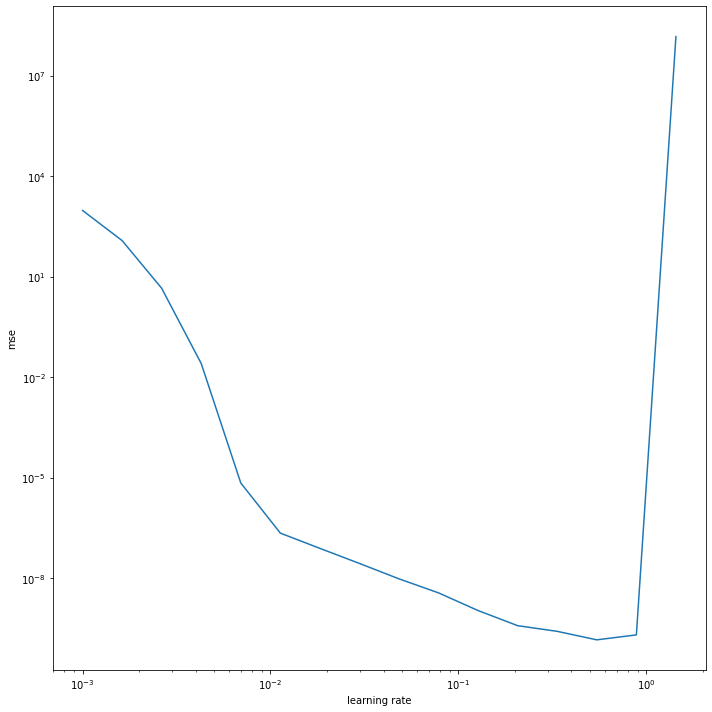

In [ ]:
import matplotlib.pyplot as plt
mses = np.array(final_mse)
mses = mses[:,0,1].astype(float)
plt.plot(np.logspace(-3,1,20), mses)
plt.xlabel("learning rate")
plt.ylabel("mse")
plt.xscale('log')
plt.yscale('log')
plt.show()


## DCASGD

In [ ]:
final_mse = []
metric = mx.metric.MSE()

for i,lr in enumerate(np.logspace(0,-2,10)):
  row = []
  for j,lamda in enumerate(np.logspace(-1,-5,10)):
    model = mx.mod.Module(
        symbol = lro ,
        data_names=['data'],
        label_names = ['lin_reg_label']# network structure
    )

    model.fit(train_iter, eval_iter,
                optimizer = 'dcasgd',
                optimizer_params={'learning_rate':lr, 'lamda': lamda},
                num_epoch=10,
                eval_metric='mse')

    result = np.array(model.score(eval_iter, metric))
    row.append(result[0,1])
  final_mse.append(row)

/usr/local/lib/python3.7/dist-packages/mxnet/metric.py:1198: RuntimeWarning: overflow encountered in square
  mse = ((label - pred)**2.0).mean()
INFO:root:Epoch[0] Train-mse=nan
INFO:root:Epoch[0] Time cost=0.189
INFO:root:Epoch[0] Validation-mse=nan
INFO:root:Epoch[1] Train-mse=nan
INFO:root:Epoch[1] Time cost=0.178
INFO:root:Epoch[1] Validation-mse=nan
INFO:root:Epoch[2] Train-mse=nan
INFO:root:Epoch[2] Time cost=0.175
INFO:root:Epoch[2] Validation-mse=nan
INFO:root:Epoch[3] Train-mse=nan
INFO:root:Epoch[3] Time cost=0.200
INFO:root:Epoch[3] Validation-mse=nan
INFO:root:Epoch[4] Train-mse=nan
INFO:root:Epoch[4] Time cost=0.165
INFO:root:Epoch[4] Validation-mse=nan
INFO:root:Epoch[5] Train-mse=nan
INFO:root:Epoch[5] Time cost=0.173
INFO:root:Epoch[5] Validation-mse=nan
INFO:root:Epoch[6] Train-mse=nan
INFO:root:Epoch[6] Time cost=0.160
INFO:root:Epoch[6] Validation-mse=nan
INFO:root:Epoch[7] Train-mse=nan
INFO:root:Epoch[7] Time cost=0.161
INFO:root:Epoch[7] Validation-mse=nan
INFO:ro

In [ ]:
final_mse = np.array(final_mse).astype(float)

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f6ca4604350>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f6ca4604350>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.ticker:vmin 1.4748378560081044e-10 vmax 57.50917053222656
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02,
       1.e+04])
DEBUG:matplotlib.ticker:vmin 1.4748378560081044e-10 vmax 57.50917053222656
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02,
       1.e+04])
DEBUG:matplotlib.ticker:vmin 1.4748378560081044e-10 vmax 57.50917053222656
DEBUG:matplotlib.ticker:ticklocs array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02,
       1.e+04])
DEBUG:matplotlib.ticker:vmin 1.4748378560081044e-10 vmax 57.50917053222656
DEBUG:matplotlib.ticker:t

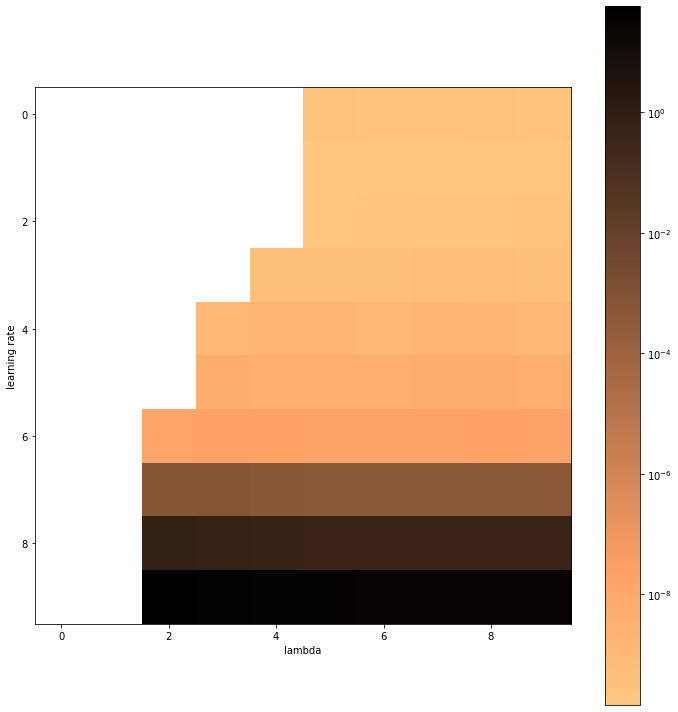

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cl
plt.rcParams["figure.figsize"] = [10.00, 10]
plt.rcParams["figure.autolayout"] = True
data2D = final_mse
im = plt.imshow(data2D, cmap="copper_r", norm=cl.LogNorm())
plt.xlabel('lambda')
plt.ylabel('learning rate')
plt.colorbar(im)
plt.show()


In [ ]:
final_mse

array([[           nan,            nan,            nan,            nan,
                   nan, 2.86852701e-10, 2.35234041e-10, 2.44031642e-10,
        2.85384563e-10, 2.25515207e-10],
       [           nan,            nan,            nan,            nan,
                   nan, 1.62816722e-10, 1.55059725e-10, 1.49654306e-10,
        1.80867581e-10, 1.65711507e-10],
       [           nan,            nan,            nan,            nan,
                   nan, 1.47483786e-10, 2.03349084e-10, 1.93032108e-10,
        1.87437666e-10, 2.56234842e-10],
       [           nan,            nan,            nan,            nan,
        4.05402670e-10, 3.93212497e-10, 3.73619670e-10, 4.18529947e-10,
        4.41343496e-10, 3.88172196e-10],
       [           nan,            nan,            nan, 9.00290245e-10,
        1.49644608e-09, 1.47150583e-09, 1.15471541e-09, 1.47517998e-09,
        1.42451179e-09, 1.12800183e-09],
       [           nan,            nan,            nan, 4.66718020e-09,
   

The lambda doesn't have an impact on performance for this simple problem. Instead, we can assess the speed of convergence to the minimum.

In [ ]:
final_mse = []
for l in np.logspace(-4,-1,20):
  model = mx.mod.Module(
      symbol = lro ,
      data_names=['data'],
      label_names = ['lin_reg_label']# network structure
  )

  model.fit(train_iter, eval_iter,
              optimizer = 'dcasgd',
              optimizer_params={'learning_rate':0.5, 'lamda': l},
              num_epoch=10,
              eval_metric='mse')



  metric = mx.metric.MSE()
  final_mse.append(model.score(eval_iter, metric))

INFO:root:Epoch[0] Train-mse=1212.598491
INFO:root:Epoch[0] Time cost=0.165
INFO:root:Epoch[0] Validation-mse=0.000000
INFO:root:Epoch[1] Train-mse=0.000000
INFO:root:Epoch[1] Time cost=0.207
INFO:root:Epoch[1] Validation-mse=0.000000
INFO:root:Epoch[2] Train-mse=0.000000
INFO:root:Epoch[2] Time cost=0.192
INFO:root:Epoch[2] Validation-mse=0.000000
INFO:root:Epoch[3] Train-mse=0.000000
INFO:root:Epoch[3] Time cost=0.195
INFO:root:Epoch[3] Validation-mse=0.000000
INFO:root:Epoch[4] Train-mse=0.000000
INFO:root:Epoch[4] Time cost=0.193
INFO:root:Epoch[4] Validation-mse=0.000000
INFO:root:Epoch[5] Train-mse=0.000000
INFO:root:Epoch[5] Time cost=0.201
INFO:root:Epoch[5] Validation-mse=0.000000
INFO:root:Epoch[6] Train-mse=0.000000
INFO:root:Epoch[6] Time cost=0.188
INFO:root:Epoch[6] Validation-mse=0.000000
INFO:root:Epoch[7] Train-mse=0.000000
INFO:root:Epoch[7] Time cost=0.197
INFO:root:Epoch[7] Validation-mse=0.000000
INFO:root:Epoch[8] Train-mse=0.000000
INFO:root:Epoch[8] Time cost=0.

DEBUG:matplotlib.ticker:vmin 8.966678097917789e-05 vmax 0.0009879542688342913
DEBUG:matplotlib.ticker:ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])
DEBUG:matplotlib.ticker:vmin 8.966678097917789e-05 vmax 0.0009879542688342913
DEBUG:matplotlib.ticker:ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])
DEBUG:matplotlib.ticker:vmin 8.966678097917789e-05 vmax 0.0009879542688342913
DEBUG:matplotlib.ticker:ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])
DEBUG:matplotlib.ticker:vmin 8.966678097917789e-05 vmax 0.0009879542688342913
DEBUG:matplotlib.ticker:ticklocs array([2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02])
DEBUG:matplotlib.ticker:vmin 8.966678097917789e-05 vmax 

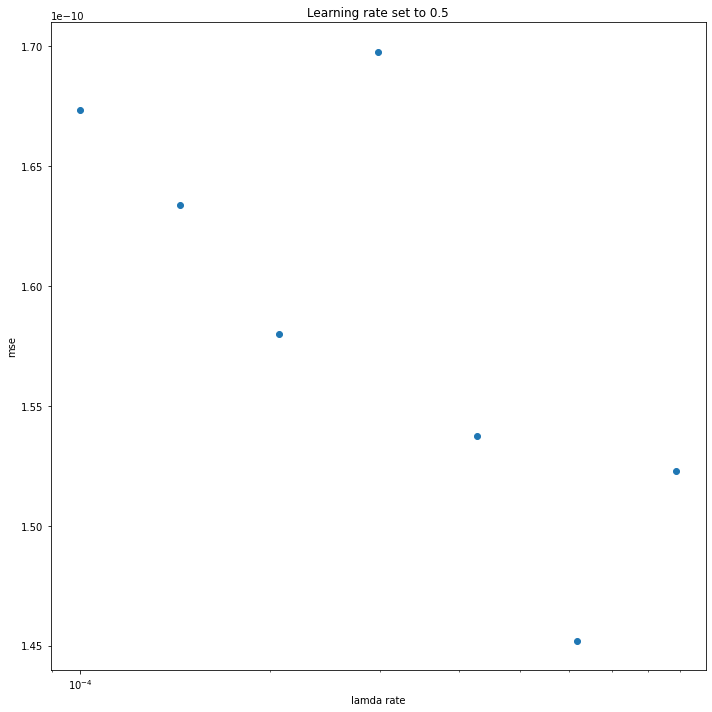

In [ ]:
mses = np.array(final_mse)
mses = mses[:,0,1].astype(float)
plt.scatter(np.logspace(-4,-1,20), mses)
plt.xlabel("lamda rate")
plt.ylabel("mse")
plt.xscale('log')
plt.title('Learning rate set to 0.5')
plt.show()

We can observe that there is no trend depending on the lamda value. It doesn't lead to better performance. 

# Check number of epochs to get same precision

## SGD

In [ ]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)
t = TicToc() #create instance of class

t.tic() #Start timer
model.fit(train_iter, eval_iter,
            optimizer = 'sgd',
            optimizer_params={'learning_rate':0.5, 'momentum': 0},
            num_epoch=1,
            eval_metric='mse')
t.toc()
metric = mx.metric.MSE()
print(model.score(eval_iter, metric))

INFO:root:Epoch[0] Train-mse=1240.635540
INFO:root:Epoch[0] Time cost=0.050
INFO:root:Epoch[0] Validation-mse=0.000000


Elapsed time is 0.080976 seconds.
[('mse', 1.6059941571056058e-10)]


## DC ASGD

In [ ]:
t = TicToc() #create instance of class
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)
t.tic() #Start timer
model.fit(train_iter, eval_iter,
            optimizer = 'dcasgd',
            optimizer_params={'learning_rate':0.5, 'lamda': 0.0001},
            num_epoch=4,
            eval_metric='mse')
t.toc() #Time elapsed since t.tic()
metric = mx.metric.MSE()
print(model.score(eval_iter, metric))

INFO:root:Epoch[0] Train-mse=1254.954525
INFO:root:Epoch[0] Time cost=0.190
INFO:root:Epoch[0] Validation-mse=0.000000
INFO:root:Epoch[1] Train-mse=0.000000
INFO:root:Epoch[1] Time cost=0.186
INFO:root:Epoch[1] Validation-mse=0.000000
INFO:root:Epoch[2] Train-mse=0.000000
INFO:root:Epoch[2] Time cost=0.189
INFO:root:Epoch[2] Validation-mse=0.000000
INFO:root:Epoch[3] Train-mse=0.000000
INFO:root:Epoch[3] Time cost=0.185
INFO:root:Epoch[3] Validation-mse=0.000000


Elapsed time is 0.896785 seconds.
[('mse', 1.545036390493415e-10)]


# Conclusion
SGD and DCASG can reach the same accuracy, since the most efficient lamda for DCASGD is zero. Indeed, when reaching this level of precision in the problem, a lamda too high puts us at risk of getting nan value (the loss skyrockets).